<a href="https://colab.research.google.com/github/lufediar/CursoPython/blob/main/Parcial_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL FINAL: MÓDELOS ANALÍTICOS**

CURSO PYTHON

UNICAFAM

ESTUDIANTE: LUISA FERNANDA DÍAZ ARENAS

DOCENTE: NICOLAS MOJICA



---




In [25]:
#INSTALACIÓN DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset=pd.read_csv("/content/sample_data/crime_data.csv")
dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


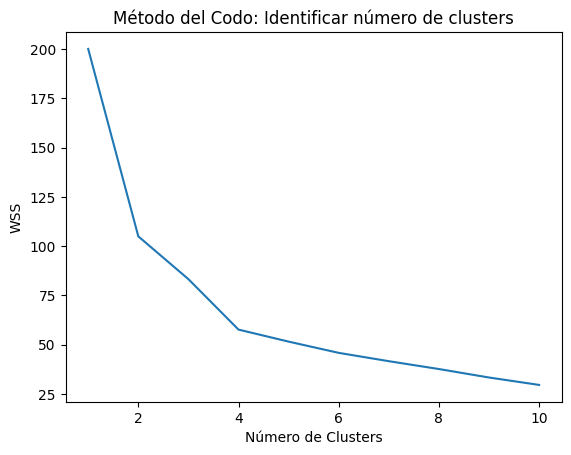

Estados con asignación de clusters:
   Unnamed: 0  Cluster
0     Alabama        1
1      Alaska        2
2     Arizona        2
3    Arkansas        1
4  California        2
Promedio de criminalidad por cluster:
            Murder     Assault   UrbanPop       Rape
Cluster                                             
0         3.600000   78.538462  52.076923  12.176923
1        13.937500  243.625000  53.750000  21.412500
2        10.966667  264.000000  76.500000  33.608333
3         5.852941  141.176471  73.647059  19.335294
Estados con mayor necesidad de profesionales especializados:
       Unnamed: 0  Murder  Assault
6     Connecticut     3.3      110
7        Delaware     5.9      238
10         Hawaii     5.3       46
13        Indiana     7.2      113
15         Kansas     6.0      115
20  Massachusetts     4.4      149
24       Missouri     9.0      178
29     New Jersey     7.4      159
34           Ohio     7.3      120
35       Oklahoma     6.6      151
36         Oregon     4.

In [43]:
# MÓDELO K-MEANS: Método del codo para determinar el número óptimo de clusters.
WSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    WSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WSS)
plt.title('Método del Codo: Identificar número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

data['Cluster'] = kmeans.labels_

print("Estados con asignación de clusters:")
print(data[['Unnamed: 0', 'Cluster']].head())

grouped_by_cluster = data.groupby('Cluster')[features].mean()
print("Promedio de criminalidad por cluster:")
print(grouped_by_cluster)

high_crime_Unnamed = data[data['Cluster'] == 3]
print("Estados con mayor necesidad de profesionales especializados:")
print(high_crime_Unnamed[['Unnamed: 0', 'Murder', 'Assault']])

**RESPUESTA A LAS PREGUNTAS PLANTEADAS**

**1. ¿Cómo podemos agrupar los estados?**

Utilizando el módelo K-Means, se pueden agrupar los estados según las variables de criminalidad.

**2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?**

Los estados con valores más altos en los delitos graves serían los que necesitarían más recursos especializados. Esto lo podemos obtener revisando los estados en los clusters con mayor promedio de criminalidad.



```
# Calcular el promedio de cada grupo en las variables
grouped_by_cluster = data.groupby('Cluster')[features].mean()
print("Promedio de criminalidad por cluster:")
print(grouped_by_cluster)
```

**3. ¿Cómo distribuiría los recursos?**

Distribuiria los recursos de acuerdo con los clusters. Por ejemplo, los estados en clusters con mayores niveles de criminalidad deberían recibir más policías especializados en homicidios y asaltos, mientras que los clusters con menor criminalidad pueden recibir más cadetes y policías de a pie.


**4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?**

Con el módelo de K-Means nos permitirá ver qué grupos (clusters) se han formado en base a los niveles de criminalidad. Cada cluster tendrá características específicas relacionadas con los delitos.

**5. Recomendaciones finales**

  

*   Asignar más policías capacitados en homicidios y asaltos (300 policías) a los estados con alta criminalidad (cluster 3).
*   Asignar más policías de a pie (500 policías) a los estados con una criminalidad moderada.
*   Asignar cadetes (150 cadetes) a los estados con baja criminalidad.
